In [1]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
from scipy.misc import logsumexp
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools as it
import zipfile,io
import pickle
import pandas as pd
import re
import sheet3 as imp
import time
%matplotlib inline
results = {}
dataset=['banana','diabetis','flare-solar','image','ringnorm']
res = ['kernel','kernelparameter','regularization','cvloss','ypred']
for k in dataset:
    results[k] ={}
    for j in res:
        results[k][j]=0.


with open('filename.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('results.p', 'wb') as handle:
#    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [2]:
results

{'banana': {'cvloss': 0.13734693877551021,
  'kernel': 'gaussian',
  'kernelparameter': 4.6415888336127775,
  'regularization': 0.0001,
  'ypred': array([[ 0.77109269],
         [-0.2448248 ],
         [-0.53843675],
         ..., 
         [ 1.04244162],
         [-0.60053262],
         [-0.16481672]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.

In [3]:
unzip = zipfile.ZipFile("sheet3_datasets.zip", 'r')        
fl = unzip.namelist() 

In [4]:
fl

['sheet3_datasets/',
 'sheet3_datasets/.DS_Store',
 '__MACOSX/',
 '__MACOSX/sheet3_datasets/',
 '__MACOSX/sheet3_datasets/._.DS_Store',
 'sheet3_datasets/U04_banana-xtest.dat',
 'sheet3_datasets/U04_banana-xtrain.dat',
 'sheet3_datasets/U04_banana-ytest.dat',
 'sheet3_datasets/U04_banana-ytrain.dat',
 'sheet3_datasets/U04_diabetis-xtest.dat',
 'sheet3_datasets/U04_diabetis-xtrain.dat',
 'sheet3_datasets/U04_diabetis-ytest.dat',
 'sheet3_datasets/U04_diabetis-ytrain.dat',
 'sheet3_datasets/U04_flare-solar-xtest.dat',
 'sheet3_datasets/U04_flare-solar-xtrain.dat',
 'sheet3_datasets/U04_flare-solar-ytest.dat',
 'sheet3_datasets/U04_flare-solar-ytrain.dat',
 'sheet3_datasets/U04_image-xtest.dat',
 'sheet3_datasets/U04_image-xtrain.dat',
 'sheet3_datasets/U04_image-ytest.dat',
 'sheet3_datasets/U04_image-ytrain.dat',
 'sheet3_datasets/U04_ringnorm-xtest.dat',
 'sheet3_datasets/U04_ringnorm-xtrain.dat',
 'sheet3_datasets/U04_ringnorm-ytest.dat',
 'sheet3_datasets/U04_ringnorm-ytrain.dat']

In [5]:
bxte=np.array(pd.read_table(unzip.open(fl[5]),header=None,delim_whitespace=True))
bxtr=np.array(pd.read_table(unzip.open(fl[6]),header=None,delim_whitespace=True))
byte=np.array(pd.read_table(unzip.open(fl[7]),header=None,delim_whitespace=True))
bytr=np.array(pd.read_table(unzip.open(fl[8]),header=None,delim_whitespace=True))

dxte=np.array(pd.read_table(unzip.open(fl[9]),header=None,delim_whitespace=True))
dxtr=np.array(pd.read_table(unzip.open(fl[10]),header=None,delim_whitespace=True))
dyte=np.array(pd.read_table(unzip.open(fl[11]),header=None,delim_whitespace=True))
dytr=np.array(pd.read_table(unzip.open(fl[12]),header=None,delim_whitespace=True))

fxte=np.array(pd.read_table(unzip.open(fl[13]),header=None,delim_whitespace=True))
fxtr=np.array(pd.read_table(unzip.open(fl[14]),header=None,delim_whitespace=True))
fyte=np.array(pd.read_table(unzip.open(fl[15]),header=None,delim_whitespace=True))
fytr=np.array(pd.read_table(unzip.open(fl[16]),header=None,delim_whitespace=True))

ixte=np.array(pd.read_table(unzip.open(fl[17]),header=None,delim_whitespace=True))
ixtr=np.array(pd.read_table(unzip.open(fl[18]),header=None,delim_whitespace=True))
iyte=np.array(pd.read_table(unzip.open(fl[19]),header=None,delim_whitespace=True))
iytr=np.array(pd.read_table(unzip.open(fl[20]),header=None,delim_whitespace=True))

rxte=np.array(pd.read_table(unzip.open(fl[21]),header=None,delim_whitespace=True))
rxtr=np.array(pd.read_table(unzip.open(fl[22]),header=None,delim_whitespace=True))
ryte=np.array(pd.read_table(unzip.open(fl[23]),header=None,delim_whitespace=True))
rytr=np.array(pd.read_table(unzip.open(fl[24]),header=None,delim_whitespace=True))

In [6]:
print(bxte.shape)
print(bxtr.shape)
print(byte.shape)
print(bytr.shape)

print(dxte.shape)
print(dxtr.shape)
print(dyte.shape)
print(dytr.shape)

print(fxte.shape)
print(fxtr.shape)
print(fyte.shape)
print(fytr.shape)

print(ixte.shape)
print(ixtr.shape)
print(iyte.shape)
print(iytr.shape)

print(rxte.shape)
print(rxtr.shape)
print(ryte.shape)
print(rytr.shape)

(2, 4900)
(2, 400)
(1, 4900)
(1, 400)
(8, 300)
(8, 468)
(1, 300)
(1, 468)
(9, 400)
(9, 666)
(1, 400)
(1, 666)
(18, 1010)
(18, 1300)
(1, 1010)
(1, 1300)
(20, 7000)
(20, 400)
(1, 7000)
(1, 400)


In [7]:
params_gaus = { 'kernel': ['gaussian'], 'kernelparameter': np.logspace(-2,2,10), 'regularization': [0]}
params_pol = { 'kernel': ['polynomial'], 'kernelparameter': np.arange(1,10), 'regularization': [0]}
params_lin = { 'kernel': ['linear'], 'kernelparameter': [0], 'regularization': [0]}

In [8]:
def zerooneloss(y_true, y_pred):
    assert(len(y_true) == len(y_pred))
    pred = np.array(y_pred[:,0])
    true = np.array(y_true[:,0])
    true[np.where(true==-1)]=0
    b = np.mean(pred)
    pred[np.where(pred>=b)] = 1
    pred[np.where(pred<b)] = 0
    right = (true == pred).astype(np.int64).sum()
    loss = (len(true)-right)/len(true)
    return loss

In [9]:
def roc_fun(y_true, y_pred, plot = False):
    assert(len(y_true) == len(y_pred))
    bins=100
    pred = np.array(y_pred[:,0])
    true = np.array(y_true[:,0])
    true[np.where(true==-1)]=0
    n=len(pred)
    thres = np.linspace(np.min(pred),np.max(pred),bins).reshape(bins,1)*np.ones((1 ,n))
    predbr = pred.reshape(1,n)*np.ones((bins ,1))
    prebl=(predbr>thres).astype(np.int64)
    comp = (prebl==true).astype(np.int64)
    tpr = (prebl*comp).sum(1)/true.sum()
    fpr = (((comp-prebl))==(-np.ones(comp.shape))).sum(1)/(n-true.sum())
    idx=np.argsort(fpr)
    roc = np.append(fpr.reshape(1,len(fpr)),tpr.reshape(1,len(tpr)),0)
    D = np.linalg.norm(roc - np.array([[0],[1]]),axis=0)
    minidx=np.argmin(D)
    loss=(n-comp[minidx].sum())/n
    ROC = roc[:,idx]
    
    if(plot==True):
        fpdif = ROC[0,1:]-ROC[0,:-1]
        lower = fpdif*ROC[1,:-1]
        upper = fpdif*ROC[1,1:]
        AUC = (lower.sum()+upper.sum())/2
        print("AUC = ",AUC)
        plt.plot(ROC[0],ROC[1])
        plt.title("ROC curve")
        plt.xlabel("FP")
        plt.ylabel("TP")
    return loss 

In [10]:
def lincv(X, y, method, parameters,nfolds=10, nrepetitions=5,loss_function=roc_fun):
    n=len(X)
    d = len(X[0])
    e = n % nfolds
    div = n-e
    nom = int(div/nfolds)
    knl = parameters['kernel']
    reg = parameters['regularization']
    losssum =np.zeros(len(reg)*len(kp))
    krrset = [method(knl,0,reg[j])]
    for i in range(nrepetitions):
        partidx=np.append((np.ones((nfolds,nom))*np.arange(nom)).reshape(div),np.arange(e))
        np.random.shuffle(partidx)
        for j in range(nfolds):
            [krrset[a].fit(X[np.where(partidx!=j)],y[np.where(partidx!=j)]) for a in range(len(krrset))]
            yy = [krrset[a].predict(X[np.where(partidx!=j)]) for a in range(len(krrset))]
            loss = [loss_function(y[np.where(partidx!=j)].reshape(len(y[np.where(partidx!=j)]),1), np.array(yy[a])) for a in range(len(yy)) ]
            losssum = losssum +np.array(loss)
    D = (losssum -losssum.mean())**2
    return krrset[np.argmin(D)]

## Banann Gaus

In [11]:
bkrr = imp.cv(bxtr.T, bytr[0], imp.krr, params_gaus,loss_function=roc_fun)

Start iterarion:   1.430511474609375e-06


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  67.32054781913757
Remain time:  3365.862512588501
End  1 te iteration.  2 te fold.
Time:  70.87585926055908
Remain time:  159.9709153175354
End  1 te iteration.  3 te fold.
Time:  74.12482023239136
Remain time:  129.9213981628418
End  1 te iteration.  4 te fold.
Time:  77.15709948539734
Remain time:  106.11231684684753
End  1 te iteration.  5 te fold.
Time:  80.15980815887451
Remain time:  90.05782842636108
End  1 te iteration.  6 te fold.
Time:  83.6801106929779
Remain time:  88.00225257873535
End  1 te iteration.  7 te fold.
Time:  86.24428391456604
Remain time:  51.25427722930908
End  1 te iteration.  8 te fold.
Time:  89.59814095497131
Remain time:  50.30244827270508
End  1 te iteration.  9 te fold.
Time:  92.93979263305664
Remain time:  33.39900255203247
End  1 te iteration.  10 te fold.
Time:  96.33930087089539
Remain time:  16.996978521347046
End  2 te iteration.  1 te fold.
Time:  99.53619170188904
Remain time:  127.85544395446777
End  2 

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


gaussian
1.6681005372
0.0001
AUC =  0.958047060608
0.112244897959
[[ 1.04544672]
 [-1.0211602 ]
 [-1.11588551]
 ..., 
 [-0.01545813]
 [-0.71081767]
 [-0.58393764]]


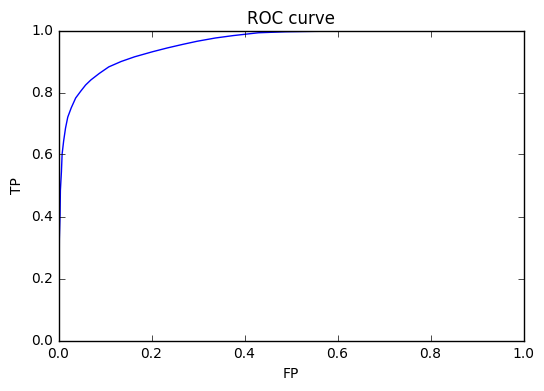

In [12]:
bYYg= bkrr.predict(bxte.T)
print(bkrr.kernel[0])
print(bkrr.kernelparameter)
print(bkrr.regularization)
print(roc_fun(byte.T, bYYg, plot = True))
print(bYYg)

In [23]:
#dataset=['banana','diabetis','flare-solar','image','ringnorm']
#res = ['kernel','kernelparameter','regularization','cvloss','ypred']
bYYg = bkrr.predict(bxte.T)
results['banana']['kernel']= bkrr.kernel[0]
results['banana']['kernelparameter'] = bkrr.kernelparameter
results['banana']['regularization'] = bkrr.regularization
results['banana']['cvloss'] = bkrr.cvloss
results['banana']['ypred'] = bYYg

with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


In [24]:
results

{'banana': {'cvloss': 2.9000000000000012,
  'kernel': 'gaussian',
  'kernelparameter': 1.6681005372000592,
  'regularization': 0.0001,
  'ypred': array([[ 1.04544672],
         [-1.0211602 ],
         [-1.11588551],
         ..., 
         [-0.01545813],
         [-0.71081767],
         [-0.58393764]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.4

## Banann polynomial

In [16]:
bkrrp = imp.cv(bxtr.T, bytr[0], imp.krr, params_pol ,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


polynomial
4
0.0001
0.137959183673
[[ 0.70939201]
 [-0.47118822]
 [-0.51649888]
 ..., 
 [ 1.5264112 ]
 [-0.70538808]
 [-0.18683148]]


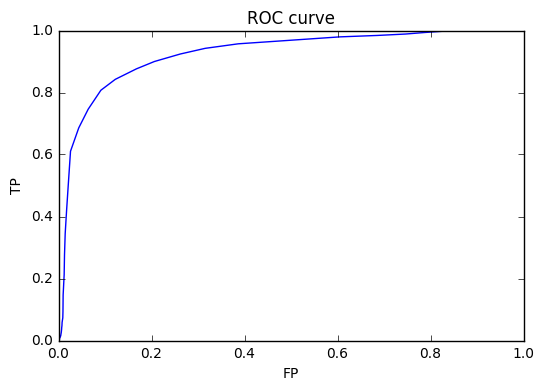

In [17]:
bYYp = bkrrp.predict(bxte.T)
print(bkrrp.kernel[0])
print(bkrrp.kernelparameter)
print(bkrrp.regularization)
print(roc_fun(byte.T, bYYp, plot = True))
print(bYYp)

## diabetis gaus

In [15]:
dkrrl = imp.cv(dxtr.T, dytr[0], imp.krr, params_lin,loss_function=roc_fun)

Start iterarion:   9.5367431640625e-07


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  11.212087154388428
Remain time:  560.4210376739502
End  1 te iteration.  2 te fold.
Time:  11.38957166671753
Remain time:  7.954123020172119
End  1 te iteration.  3 te fold.
Time:  11.564619064331055
Remain time:  6.972379684448242
End  1 te iteration.  4 te fold.
Time:  11.73529601097107
Remain time:  5.947449207305908
End  1 te iteration.  5 te fold.
Time:  11.90887451171875
Remain time:  5.185253620147705
End  1 te iteration.  6 te fold.
Time:  12.085864067077637
Remain time:  4.406040906906128
End  1 te iteration.  7 te fold.
Time:  12.260547637939453
Remain time:  3.478970527648926
End  1 te iteration.  8 te fold.
Time:  12.434414625167847
Remain time:  2.5961709022521973
End  1 te iteration.  9 te fold.
Time:  12.610213994979858
Remain time:  1.7522358894348145
End  1 te iteration.  10 te fold.
Time:  12.789142847061157
Remain time:  0.8903610706329346
End  2 te iteration.  1 te fold.
Time:  12.974074125289917
Remain time:  7.35825538635253

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


The used kernel linear
AUC =  0.845878136201
0.23


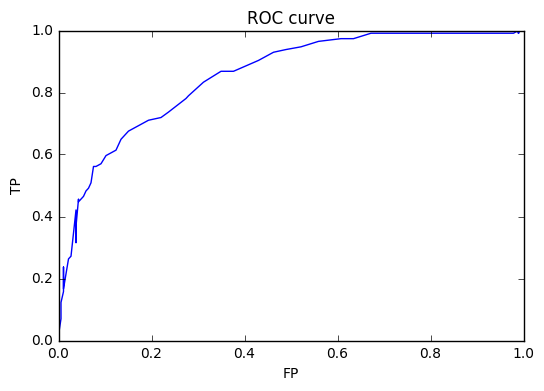

In [17]:
dYYl = dkrrl.predict(dxte.T)
print("The used kernel",dkrrl.kernel[0])
print(roc_fun(dyte.T, dYYl, plot = True))

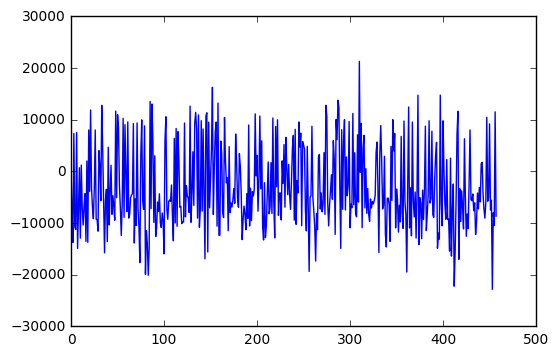

In [18]:
plt.plot(dkrrl.alpha)

In [19]:
dkrrg = imp.cv(dxtr.T, dytr[0], imp.krr, params_gaus,loss_function=roc_fun)

Start iterarion:   1.430511474609375e-06


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  114.66086220741272
Remain time:  5732.727539539337
End  1 te iteration.  2 te fold.
Time:  119.37128067016602
Remain time:  211.93750262260437
End  1 te iteration.  3 te fold.
Time:  124.16270875930786
Remain time:  191.65196418762207
End  1 te iteration.  4 te fold.
Time:  128.95039463043213
Remain time:  167.69181370735168
End  1 te iteration.  5 te fold.
Time:  133.65843176841736
Remain time:  141.12793922424316
End  1 te iteration.  6 te fold.
Time:  138.40868282318115
Remain time:  118.75302791595459
End  1 te iteration.  7 te fold.
Time:  143.18778324127197
Remain time:  95.57939052581787
End  1 te iteration.  8 te fold.
Time:  147.94922256469727
Remain time:  71.41956925392151
End  1 te iteration.  9 te fold.
Time:  152.73392415046692
Remain time:  47.845704555511475
End  1 te iteration.  10 te fold.
Time:  158.01031231880188
Remain time:  26.381295919418335
End  2 te iteration.  1 te fold.
Time:  163.00620532035828
Remain time:  199.83885

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide


End  3 te iteration.  5 te fold.
Time:  229.97345614433289
Remain time:  86.28060007095337
End  3 te iteration.  6 te fold.
Time:  235.00169205665588
Remain time:  75.43190002441406
End  3 te iteration.  7 te fold.
Time:  239.7935483455658
Remain time:  57.47006320953369
End  3 te iteration.  8 te fold.
Time:  244.52611184120178
Remain time:  42.58360004425049
End  3 te iteration.  9 te fold.
Time:  249.2715549468994
Remain time:  28.472745895385742
End  3 te iteration.  10 te fold.
Time:  253.8906910419464
Remain time:  13.86514949798584
End  4 te iteration.  1 te fold.
Time:  258.36639285087585
Remain time:  89.44354057312012
End  4 te iteration.  2 te fold.
Time:  263.0306396484375
Remain time:  83.94486379623413
End  4 te iteration.  3 te fold.
Time:  267.81780767440796
Remain time:  76.58381652832031
End  4 te iteration.  4 te fold.
Time:  272.524386882782
Remain time:  65.87889099121094
End  4 te iteration.  5 te fold.
Time:  277.49857449531555
Remain time:  59.654897689819336
En

gaussian
35.938136638
0.0001
AUC =  0.856300697982


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


0.213333333333
[[ -1.95767968e-01]
 [ -3.65473188e-01]
 [  6.73930210e-01]
 [ -2.95505021e-01]
 [ -1.93868762e-01]
 [ -1.00044744e+00]
 [  7.48030204e-01]
 [ -4.21310955e-01]
 [  2.64013134e-01]
 [ -7.93049412e-01]
 [ -2.33047378e-02]
 [ -3.09840321e-01]
 [ -4.07876806e-01]
 [ -5.26363066e-01]
 [ -1.07822980e+00]
 [ -1.60935479e-03]
 [ -7.21311237e-01]
 [  3.33686619e-01]
 [ -1.22579400e+00]
 [ -2.73567523e-01]
 [ -2.60811825e-01]
 [ -5.89063105e-01]
 [ -1.39197034e-01]
 [ -8.91979465e-01]
 [ -7.25986784e-01]
 [ -3.14737627e-01]
 [ -7.41051304e-01]
 [  5.55354991e-01]
 [ -9.42727994e-01]
 [ -3.46300972e-01]
 [ -8.82186090e-01]
 [  6.43761803e-02]
 [  2.13847059e-01]
 [  4.15900537e-01]
 [ -4.42754258e-01]
 [  5.41527169e-03]
 [ -2.92774363e-01]
 [ -4.59952169e-01]
 [  6.08691598e-01]
 [ -6.22825082e-01]
 [ -1.96849541e-01]
 [ -1.86422560e-01]
 [ -6.96621407e-01]
 [ -6.40501782e-01]
 [ -3.74064714e-01]
 [  1.89253489e-01]
 [  1.23473378e-01]
 [  6.03158956e-01]
 [ -4.56925933e-01]
 [ -2

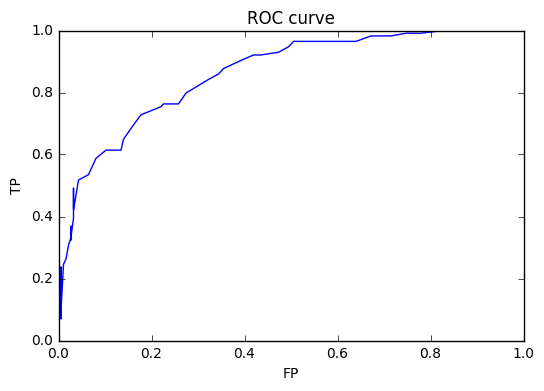

In [20]:
dYYg = dkrrg.predict(dxte.T)
print(dkrrg.kernel[0])
print(dkrrg.kernelparameter)
print(dkrrg.regularization)
print(roc_fun(dyte.T, dYYg, plot = True))
print(dYYg)

In [21]:
dkrrp = imp.cv(dxtr.T, dytr[0], imp.krr, params_pol,loss_function=roc_fun)

Start iterarion:   7.152557373046875e-07


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  100.58210039138794
Remain time:  5028.965401649475
End  1 te iteration.  2 te fold.
Time:  102.6787919998169
Remain time:  94.31862473487854
End  1 te iteration.  3 te fold.
Time:  104.89264822006226
Remain time:  88.52005958557129
End  1 te iteration.  4 te fold.
Time:  106.75760078430176
Remain time:  65.25251984596252
End  1 te iteration.  5 te fold.
Time:  108.59657526016235
Remain time:  55.152010917663574
End  1 te iteration.  6 te fold.
Time:  110.53555965423584
Remain time:  48.490166664123535
End  1 te iteration.  7 te fold.
Time:  112.55773973464966
Remain time:  40.417351722717285
End  1 te iteration.  8 te fold.
Time:  114.45978116989136
Remain time:  28.521798849105835
End  1 te iteration.  9 te fold.
Time:  116.3928575515747
Remain time:  19.325127601623535
End  1 te iteration.  10 te fold.
Time:  118.2896842956543
Remain time:  9.501560926437378
End  2 te iteration.  1 te fold.
Time:  120.18137502670288
Remain time:  75.47219276428

polynomial
1
0.0001
AUC =  0.844769854744


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


0.25
[[  6.51390337e-03]
 [ -3.29320407e-01]
 [  4.78603169e-01]
 [ -4.04451158e-01]
 [ -1.84310369e-01]
 [ -1.19802089e+00]
 [  5.28928509e-01]
 [ -4.47739567e-01]
 [  8.30696054e-02]
 [ -1.02590535e+00]
 [ -2.62724509e-02]
 [ -6.23144115e-01]
 [ -4.46053732e-01]
 [ -5.42106393e-01]
 [ -1.08429914e+00]
 [  4.35256934e-01]
 [ -9.14704821e-01]
 [  7.02505495e-01]
 [ -1.23068709e+00]
 [ -3.93873775e-01]
 [ -4.74005016e-01]
 [ -4.76004161e-01]
 [ -1.77777202e-01]
 [ -7.79410798e-01]
 [ -5.54039028e-01]
 [ -6.56040906e-01]
 [ -6.62610593e-01]
 [  6.59414870e-01]
 [ -1.06988215e+00]
 [ -3.48004365e-01]
 [ -8.79975413e-01]
 [ -2.22610977e-02]
 [  3.83098739e-01]
 [  3.37865956e-01]
 [ -7.77963617e-01]
 [  1.92911068e-01]
 [ -3.23943792e-01]
 [ -2.70720889e-01]
 [  8.15375108e-01]
 [ -6.84690518e-01]
 [ -3.91618359e-01]
 [ -1.36461095e-01]
 [ -5.68079488e-01]
 [ -7.52759279e-01]
 [ -3.25867826e-01]
 [  1.67488772e-01]
 [  4.62163339e-02]
 [  4.56362569e-01]
 [ -4.86427228e-01]
 [ -3.75511936e

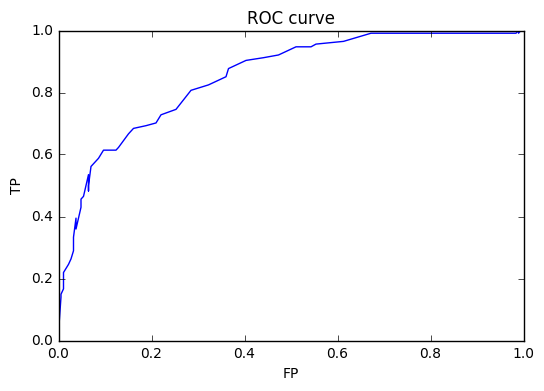

In [22]:
dYYp = dkrrp.predict(dxte.T)
print(dkrrp.kernel[0])
print(dkrrp.kernelparameter)
print(dkrrp.regularization)
print(roc_fun(dyte.T, dYYp, plot = True))
print(dYYp)

In [25]:
results['diabetis']['kernel']= dkrrg.kernel[0]
results['diabetis']['kernelparameter'] = dkrrg.kernelparameter
results['diabetis']['regularization'] = dkrrg.regularization
results['diabetis']['cvloss'] = dkrrg.cvloss
results['diabetis']['ypred'] = dYYg



In [27]:
with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [29]:
results

{'banana': {'cvloss': 2.9000000000000012,
  'kernel': 'gaussian',
  'kernelparameter': 1.6681005372000592,
  'regularization': 0.0001,
  'ypred': array([[ 1.04544672],
         [-1.0211602 ],
         [-1.11588551],
         ..., 
         [-0.01545813],
         [-0.71081767],
         [-0.58393764]])},
 'diabetis': {'cvloss': 10.690909090909091,
  'kernel': 'gaussian',
  'kernelparameter': 35.938136638046259,
  'regularization': 0.0001,
  'ypred': array([[ -1.95767968e-01],
         [ -3.65473188e-01],
         [  6.73930210e-01],
         [ -2.95505021e-01],
         [ -1.93868762e-01],
         [ -1.00044744e+00],
         [  7.48030204e-01],
         [ -4.21310955e-01],
         [  2.64013134e-01],
         [ -7.93049412e-01],
         [ -2.33047378e-02],
         [ -3.09840321e-01],
         [ -4.07876806e-01],
         [ -5.26363066e-01],
         [ -1.07822980e+00],
         [ -1.60935479e-03],
         [ -7.21311237e-01],
         [  3.33686619e-01],
         [ -1.22579400e+00

## flare-solar gaus

In [30]:
fkrrl = imp.cv(fxtr.T, fytr[0], imp.krr, params_lin,loss_function=roc_fun)

Start iterarion:   1.1920928955078125e-06


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  46.20079016685486
Remain time:  2309.913694858551
End  1 te iteration.  2 te fold.
Time:  46.63312029838562
Remain time:  19.42084550857544
End  1 te iteration.  3 te fold.
Time:  47.080952644348145
Remain time:  17.88473129272461
End  1 te iteration.  4 te fold.
Time:  47.51852059364319
Remain time:  15.288283824920654
End  1 te iteration.  5 te fold.
Time:  47.9532835483551
Remain time:  13.02161693572998
End  1 te iteration.  6 te fold.
Time:  48.392799377441406
Remain time:  10.969585180282593
End  1 te iteration.  7 te fold.
Time:  48.82472109794617
Remain time:  8.623676300048828
End  1 te iteration.  8 te fold.
Time:  49.260228872299194
Remain time:  6.521741151809692
End  1 te iteration.  9 te fold.
Time:  49.6927707195282
Remain time:  4.317994117736816
End  1 te iteration.  10 te fold.
Time:  50.12468767166138
Remain time:  2.1558773517608643
End  2 te iteration.  1 te fold.
Time:  50.57413983345032
Remain time:  17.936477661132812
End 

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


linear
0
0.0001
AUC =  0.699492063492
0.3075
[[-0.24471171]
 [-0.24471171]
 [-0.27743741]
 [ 0.79069486]
 [ 0.06632508]
 [ 0.06632508]
 [ 0.06632508]
 [-0.24471171]
 [ 1.19299522]
 [-0.24471171]
 [-0.24471171]
 [ 0.06632508]
 [-0.24471171]
 [-0.24471171]
 [ 1.05094417]
 [ 0.5954812 ]
 [ 0.09905078]
 [ 0.22142957]
 [ 1.3704235 ]
 [ 1.08366987]
 [-0.31016311]
 [ 0.03359938]
 [ 0.06632508]
 [-0.27743741]
 [-0.27743741]
 [-0.09386923]
 [ 0.12751447]
 [ 0.70718168]
 [ 0.47310241]
 [ 0.5342918 ]
 [ 0.16024017]
 [ 0.12751447]
 [ 0.4403767 ]
 [ 0.70718168]
 [-0.27743741]
 [-0.24471171]
 [-0.27743741]
 [-0.24471171]
 [ 0.12933992]
 [-0.24471171]
 [ 0.73990738]
 [ 0.5015661 ]
 [ 0.47310241]
 [-0.24471171]
 [-0.24471171]
 [-0.06033128]
 [-0.27743741]
 [-0.24471171]
 [ 0.4403767 ]
 [-0.24471171]
 [ 0.47310241]
 [ 1.16453152]
 [-0.24471171]
 [ 0.06632508]
 [-0.27743741]
 [ 0.31108265]
 [ 0.09905078]
 [-0.27743741]
 [ 0.28261896]
 [-0.24471171]
 [-0.18352232]
 [ 0.06632508]
 [-0.24471171]
 [-0.24471

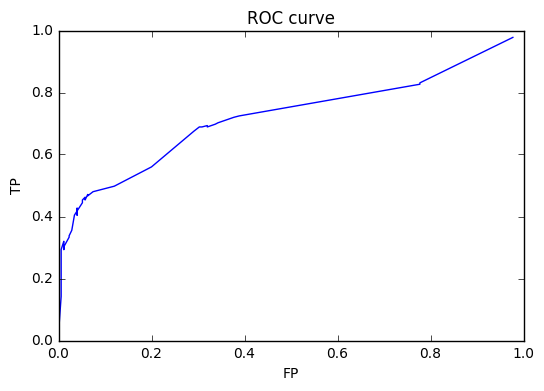

In [32]:
fYYl = fkrrl.predict(fxte.T)
print(fkrrl.kernel[0])
print(fkrrl.kernelparameter)
print(fkrrl.regularization)
print(roc_fun(fyte.T, fYYl, plot = True))
print(fYYl)

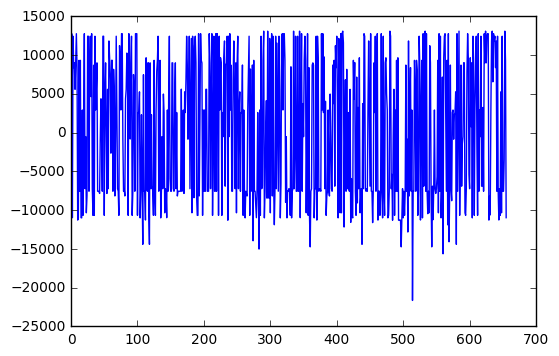

In [33]:
plt.plot(fkrrl.alpha)

In [34]:
fkrrg = imp.cv(fxtr.T, fytr[0], imp.krr, params_gaus,loss_function=roc_fun)

Start iterarion:   9.5367431640625e-07


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  330.3074667453766
Remain time:  16515.21484851837
End  1 te iteration.  2 te fold.
Time:  339.59111189842224
Remain time:  417.75882840156555
End  1 te iteration.  3 te fold.
Time:  348.7551202774048
Remain time:  366.57628059387207
End  1 te iteration.  4 te fold.
Time:  356.75878500938416
Remain time:  280.0669825077057
End  1 te iteration.  5 te fold.
Time:  365.79882049560547
Remain time:  271.1390519142151
End  1 te iteration.  6 te fold.
Time:  374.80213618278503
Remain time:  225.0921905040741
End  1 te iteration.  7 te fold.
Time:  383.9128565788269
Remain time:  182.2014284133911
End  1 te iteration.  8 te fold.
Time:  392.95121717453003
Remain time:  135.5551564693451
End  1 te iteration.  9 te fold.
Time:  401.58375000953674
Remain time:  86.31883382797241
End  1 te iteration.  10 te fold.
Time:  410.6453912258148
Remain time:  45.304354429244995
End  2 te iteration.  1 te fold.
Time:  419.4087793827057
Remain time:  350.4837226867676


gaussian
35.938136638
0.0001
AUC =  0.400838095238


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


0.3025
[[-0.27186273]
 [-0.27186273]
 [-0.21567954]
 [ 1.11103634]
 [ 0.03821248]
 [ 0.03821248]
 [ 0.03821248]
 [-0.27186273]
 [ 0.58675701]
 [-0.27186273]
 [-0.27186273]
 [ 0.03821248]
 [-0.27186273]
 [-0.27186273]
 [ 1.15395658]
 [ 0.72158577]
 [ 0.06834062]
 [ 0.32942406]
 [ 0.85213884]
 [ 1.18861896]
 [-0.17099784]
 [-0.00356415]
 [ 0.03821248]
 [-0.21567954]
 [-0.21567954]
 [-0.05826147]
 [ 0.16068826]
 [ 0.92418768]
 [ 0.3864756 ]
 [ 0.56533258]
 [ 0.21013623]
 [ 0.16068826]
 [ 0.33761469]
 [ 0.92418768]
 [-0.21567954]
 [-0.27186273]
 [-0.21567954]
 [-0.27186273]
 [ 0.02082862]
 [-0.27186273]
 [ 0.87257089]
 [ 0.49717931]
 [ 0.3864756 ]
 [-0.27186273]
 [-0.27186273]
 [-0.08466513]
 [-0.21567954]
 [-0.27186273]
 [ 0.33761469]
 [-0.27186273]
 [ 0.3864756 ]
 [ 0.49276432]
 [-0.27186273]
 [ 0.03821248]
 [-0.21567954]
 [ 0.39439555]
 [ 0.06834062]
 [-0.21567954]
 [ 0.42621432]
 [-0.27186273]
 [-0.17799244]
 [ 0.03821248]
 [-0.27186273]
 [-0.27186273]
 [-0.27186273]
 [ 1.15395658]
 [ 

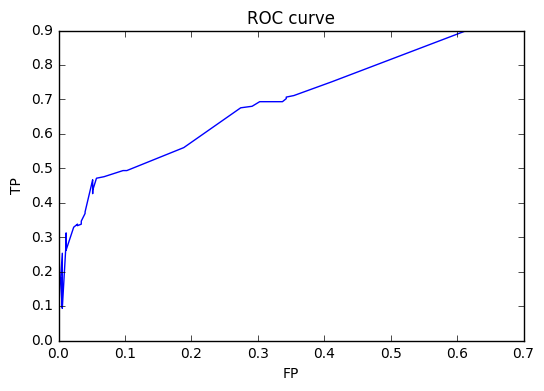

In [35]:
fYYg = fkrrg.predict(fxte.T)
print(fkrrg.kernel[0])
print(fkrrg.kernelparameter)
print(fkrrg.regularization)
print(roc_fun(fyte.T, fYYg, plot = True))
print(fYYg)

In [45]:
results['flare-solar']['kernel']= fkrrl.kernel[0]
results['flare-solar']['kernelparameter'] = fkrrl.kernelparameter
results['flare-solar']['regularization'] = fkrrl.regularization
results['flare-solar']['cvloss'] = fkrrl.cvloss
results['flare-solar']['ypred'] = fYYl

In [46]:
with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [47]:
results

{'banana': {'cvloss': 2.9000000000000012,
  'kernel': 'gaussian',
  'kernelparameter': 1.6681005372000592,
  'regularization': 0.0001,
  'ypred': array([[ 1.04544672],
         [-1.0211602 ],
         [-1.11588551],
         ..., 
         [-0.01545813],
         [-0.71081767],
         [-0.58393764]])},
 'diabetis': {'cvloss': 10.690909090909091,
  'kernel': 'gaussian',
  'kernelparameter': 35.938136638046259,
  'regularization': 0.0001,
  'ypred': array([[ -1.95767968e-01],
         [ -3.65473188e-01],
         [  6.73930210e-01],
         [ -2.95505021e-01],
         [ -1.93868762e-01],
         [ -1.00044744e+00],
         [  7.48030204e-01],
         [ -4.21310955e-01],
         [  2.64013134e-01],
         [ -7.93049412e-01],
         [ -2.33047378e-02],
         [ -3.09840321e-01],
         [ -4.07876806e-01],
         [ -5.26363066e-01],
         [ -1.07822980e+00],
         [ -1.60935479e-03],
         [ -7.21311237e-01],
         [  3.33686619e-01],
         [ -1.22579400e+00

In [39]:
fkrrp = imp.cv(fxtr.T, fytr[0], imp.krr, params_pol,loss_function=roc_fun)

Start iterarion:   1.430511474609375e-06


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI


LinAlgError: Singular matrix

In [ ]:
fYYp = fkrrp.predict(fxte.T)
print(fkrrp.kernel[0])
print(fkrrp.kernelparameter)
print(fkrrp.regularization)
print(roc_fun(fyte.T, fYYp, plot = True))
print(fYYp)

## image-gau

In [50]:
ikrrl = imp.cv(ixtr.T, iytr[0], imp.krr, params_lin,loss_function=roc_fun)

Start iterarion:   1.430511474609375e-06


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  414.0221185684204
Remain time:  20701.626241207123
End  1 te iteration.  2 te fold.
Time:  419.57488203048706
Remain time:  258.8166153430939
End  1 te iteration.  3 te fold.
Time:  424.51512336730957
Remain time:  181.69259071350098
End  1 te iteration.  4 te fold.
Time:  427.51397585868835
Remain time:  104.35380697250366
End  1 te iteration.  5 te fold.
Time:  430.5071396827698
Remain time:  89.8042631149292
End  1 te iteration.  6 te fold.
Time:  433.3619632720947
Remain time:  71.35609984397888
End  1 te iteration.  7 te fold.
Time:  436.34334993362427
Remain time:  59.616312980651855
End  1 te iteration.  8 te fold.
Time:  439.20027351379395
Remain time:  42.838683128356934
End  1 te iteration.  9 te fold.
Time:  442.43793058395386
Remain time:  32.380497455596924
End  1 te iteration.  10 te fold.
Time:  445.32340693473816
Remain time:  14.423563480377197
End  2 te iteration.  1 te fold.
Time:  448.5618863105774
Remain time:  108.3646774291

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


linear
0
0.0001
AUC =  0.870657722094
0.185148514851
[[ 0.69327584]
 [-0.66020007]
 [ 0.26247227]
 ..., 
 [-0.53325973]
 [-0.05732539]
 [ 0.06164567]]


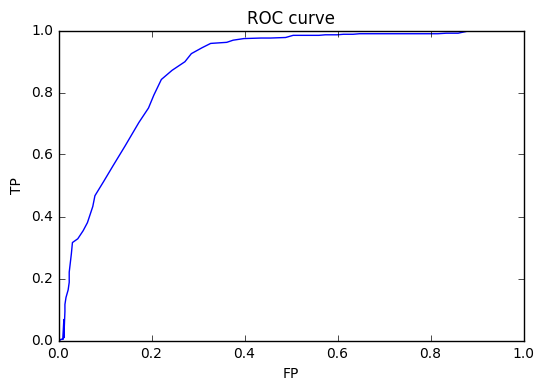

In [52]:
iYYl = ikrrl.predict(ixte.T)
print(ikrrl.kernel[0])
print(ikrrl.kernelparameter)
print(ikrrl.regularization)
print(roc_fun(iyte.T, iYYl, plot = True))
print(iYYl)

In [53]:
results['image']['kernel']= ikrrl.kernel[0]
results['image']['kernelparameter'] = ikrrl.kernelparameter
results['image']['regularization'] = ikrrl.regularization
results['image']['cvloss'] = ikrrl.cvloss
results['image']['ypred'] = iYYl

In [54]:
with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [55]:
results

{'banana': {'cvloss': 2.9000000000000012,
  'kernel': 'gaussian',
  'kernelparameter': 1.6681005372000592,
  'regularization': 0.0001,
  'ypred': array([[ 1.04544672],
         [-1.0211602 ],
         [-1.11588551],
         ..., 
         [-0.01545813],
         [-0.71081767],
         [-0.58393764]])},
 'diabetis': {'cvloss': 10.690909090909091,
  'kernel': 'gaussian',
  'kernelparameter': 35.938136638046259,
  'regularization': 0.0001,
  'ypred': array([[ -1.95767968e-01],
         [ -3.65473188e-01],
         [  6.73930210e-01],
         [ -2.95505021e-01],
         [ -1.93868762e-01],
         [ -1.00044744e+00],
         [  7.48030204e-01],
         [ -4.21310955e-01],
         [  2.64013134e-01],
         [ -7.93049412e-01],
         [ -2.33047378e-02],
         [ -3.09840321e-01],
         [ -4.07876806e-01],
         [ -5.26363066e-01],
         [ -1.07822980e+00],
         [ -1.60935479e-03],
         [ -7.21311237e-01],
         [  3.33686619e-01],
         [ -1.22579400e+00

In [ ]:
ikrrg = imp.cv(ixtr.T, iytr[0], imp.krr, params_gaus,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


In [ ]:
iYYg = ikrrg.predict(fxte.T)
print(ikrrg.kernel[0])
print(ikrrg.kernelparameter)
print(ikrrg.regularization)
print(roc_fun(iyte.T, iYYg, plot = True))
print(iYYg)

## ringnorm

In [40]:
rkrrl = imp.cv(rxtr.T, rytr[0], imp.krr, params_lin,loss_function=roc_fun)

Start iterarion:   1.430511474609375e-06


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  10.255561590194702
Remain time:  512.6029968261719
End  1 te iteration.  2 te fold.
Time:  10.40093731880188
Remain time:  6.535931825637817
End  1 te iteration.  3 te fold.
Time:  10.53075098991394
Remain time:  5.187435150146484
End  1 te iteration.  4 te fold.
Time:  10.644609928131104
Remain time:  3.980640172958374
End  1 te iteration.  5 te fold.
Time:  10.767816066741943
Remain time:  3.6922073364257812
End  1 te iteration.  6 te fold.
Time:  10.891026258468628
Remain time:  3.076988458633423
End  1 te iteration.  7 te fold.
Time:  11.012290000915527
Remain time:  2.4228858947753906
End  1 te iteration.  8 te fold.
Time:  11.128294229507446
Remain time:  1.7380642890930176
End  1 te iteration.  9 te fold.
Time:  11.254802703857422
Remain time:  1.2637662887573242
End  1 te iteration.  10 te fold.
Time:  11.37614631652832
Remain time:  0.6060659885406494
End  2 te iteration.  1 te fold.
Time:  11.50415301322937
Remain time:  5.1050186157226

linear
0
0.0001


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


AUC =  0.806212818366
0.240714285714
[[-0.3034563 ]
 [-0.52723528]
 [-0.2784598 ]
 ..., 
 [-0.19117111]
 [-0.20791406]
 [-0.02569983]]


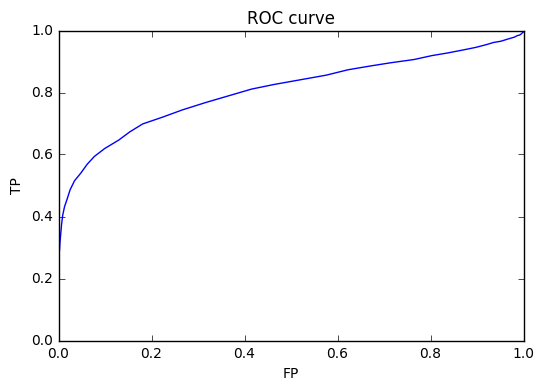

In [41]:
rYYl = rkrrl.predict(rxte.T)
print(rkrrl.kernel[0])
print(rkrrl.kernelparameter)
print(rkrrl.regularization)
print(roc_fun(ryte.T, rYYl, plot = True))
print(rYYl)

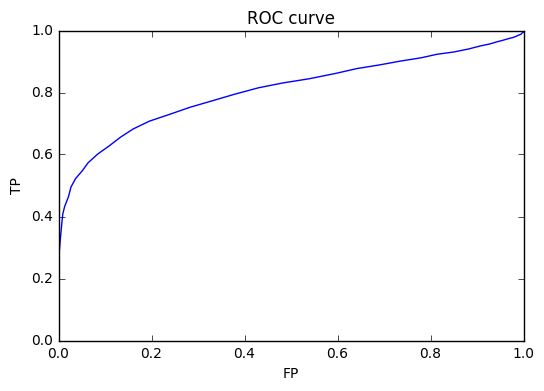

In [46]:
results['ringnorm']['kernel']= rkrrl.kernel[0]
results['ringnorm']['kernelparameter'] = rkrrl.kernelparameter
results['ringnorm']['regularization'] = rkrrl.regularization
results['ringnorm']['cvloss'] = roc_fun(ryte.T, rYYl, plot = True)
results['ringnorm']['ypred'] = rYYl

with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [47]:
results

{'banana': {'cvloss': 0.13734693877551021,
  'kernel': 'gaussian',
  'kernelparameter': 4.6415888336127775,
  'regularization': 0.0001,
  'ypred': array([[ 0.74365347],
         [-0.23530607],
         [-0.58487961],
         ..., 
         [ 1.40002271],
         [-0.57515849],
         [-0.21547057]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.

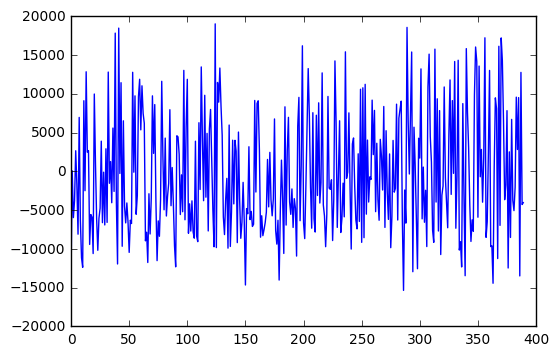

In [40]:
plt.plot(rkrrl.alpha)

In [42]:
rkrrg = imp.cv(rxtr.T, rytr[0], imp.krr, params_gaus,loss_function=roc_fun)

Start iterarion:   9.5367431640625e-07


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:118: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  71.41186881065369
Remain time:  3570.326566696167
End  1 te iteration.  2 te fold.
Time:  75.09839272499084
Remain time:  165.86206555366516
End  1 te iteration.  3 te fold.
Time:  78.75798749923706
Remain time:  146.3550853729248
End  1 te iteration.  4 te fold.
Time:  82.42056274414062
Remain time:  128.1646490097046
End  1 te iteration.  5 te fold.
Time:  86.09399366378784
Remain time:  110.18297910690308
End  1 te iteration.  6 te fold.
Time:  89.81994318962097
Remain time:  93.1295394897461
End  1 te iteration.  7 te fold.
Time:  93.52726721763611
Remain time:  74.13171768188477
End  1 te iteration.  8 te fold.
Time:  97.23361086845398
Remain time:  55.58466196060181
End  1 te iteration.  9 te fold.
Time:  100.91951894760132
Remain time:  36.85179948806763
End  1 te iteration.  10 te fold.
Time:  104.57845258712769
Remain time:  18.291072845458984
End  2 te iteration.  1 te fold.
Time:  108.27535438537598
Remain time:  147.8388500213623
End 

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:78: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


gaussian
1.6681005372
0.0001
AUC =  0.995704888801
0.0265714285714
[[-0.30476664]
 [-1.03591385]
 [ 0.09470157]
 ..., 
 [-0.0018193 ]
 [-0.01799695]
 [ 0.00646591]]


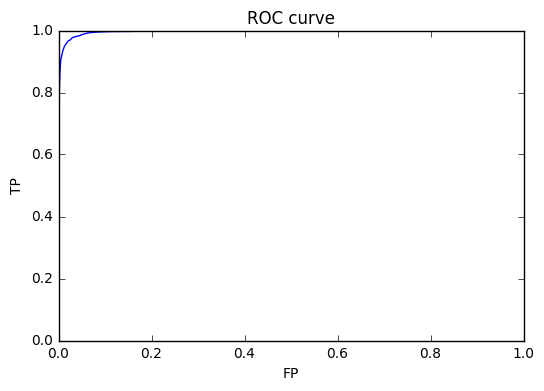

In [44]:
rYYg = rkrrg.predict(rxte.T)
print(rkrrg.kernel[0])
print(rkrrg.kernelparameter)
print(rkrrg.regularization)
print(roc_fun(ryte.T, rYYg, plot = True))
print(rYYg)

In [48]:
results['ringnorm']['kernel']= rkrrg.kernel[0]
results['ringnorm']['kernelparameter'] = rkrrg.kernelparameter
results['ringnorm']['regularization'] = rkrrg.regularization
results['ringnorm']['cvloss'] = rkrrg.cvloss
results['ringnorm']['ypred'] = rYYg

with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [49]:
results

{'banana': {'cvloss': 2.9000000000000012,
  'kernel': 'gaussian',
  'kernelparameter': 1.6681005372000592,
  'regularization': 0.0001,
  'ypred': array([[ 1.04544672],
         [-1.0211602 ],
         [-1.11588551],
         ..., 
         [-0.01545813],
         [-0.71081767],
         [-0.58393764]])},
 'diabetis': {'cvloss': 10.690909090909091,
  'kernel': 'gaussian',
  'kernelparameter': 35.938136638046259,
  'regularization': 0.0001,
  'ypred': array([[ -1.95767968e-01],
         [ -3.65473188e-01],
         [  6.73930210e-01],
         [ -2.95505021e-01],
         [ -1.93868762e-01],
         [ -1.00044744e+00],
         [  7.48030204e-01],
         [ -4.21310955e-01],
         [  2.64013134e-01],
         [ -7.93049412e-01],
         [ -2.33047378e-02],
         [ -3.09840321e-01],
         [ -4.07876806e-01],
         [ -5.26363066e-01],
         [ -1.07822980e+00],
         [ -1.60935479e-03],
         [ -7.21311237e-01],
         [  3.33686619e-01],
         [ -1.22579400e+00

In [44]:
rkrrp = imp.cv(rxtr.T, rytr[0], imp.krr, params_pol,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


polynomial
2
0.0001
0.495857142857
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


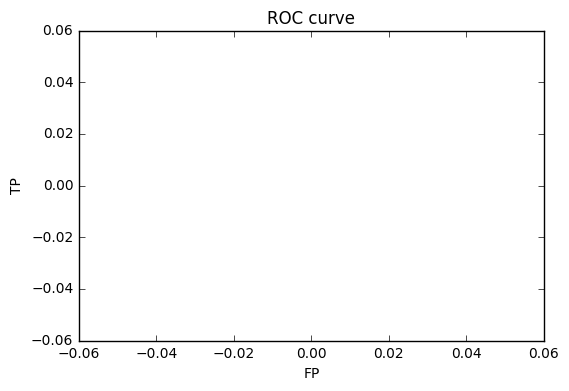

In [45]:
rYYp = rkrrg.predict(rxte.T)
print(rkrrp.kernel[0])
print(rkrrp.kernelparameter)
print(rkrrp.regularization)
print(roc_fun(ryte.T, rYYp, plot = True))
print(rYYp)

In [150]:
KCI_inv=np.linalg.solve(KKK+0.0000001*I,I)

In [158]:
S=np.dot(KCI_inv.transpose(0,2,1),KK.T).transpose(0,2,1)
print((np.dot(S,np.ones((5,1)))-(np.ones(5).reshape(5,1)*br)).shape)

(10, 5, 1)


In [170]:
(np.ones(5).reshape(5,1)*br)
err = np.dot(I*S,np.ones((5,1))).mean(1)
np.argmin(err[:,0])

0

In [133]:
tre = np.array(([np.array([[1,2],[3,4]])*3],[np.array([[1,2],[3,4]])*2],[np.array([[1,2],[3,4]])]))
tre=tre.reshape(3,2,2)
np.dot(tre.transpose(0,2,1),np.ones((2,2))).transpose(0,2,1)

array([[[ 12.,  18.],
        [ 12.,  18.]],

       [[  8.,  12.],
        [  8.,  12.]],

       [[  4.,   6.],
        [  4.,   6.]]])

In [134]:
tre

array([[[ 3,  6],
        [ 9, 12]],

       [[ 2,  4],
        [ 6,  8]],

       [[ 1,  2],
        [ 3,  4]]])

In [43]:
n = 30
bins =100
m=0
k=1
thres = np.linspace(m,k,bins).reshape(bins,1)*np.ones((1 ,n))
dt = np.random.rand(1,n)*np.ones((bins ,1))

In [44]:
thres 

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01010101,  0.01010101,  0.01010101, ...,  0.01010101,
         0.01010101,  0.01010101],
       [ 0.02020202,  0.02020202,  0.02020202, ...,  0.02020202,
         0.02020202,  0.02020202],
       ..., 
       [ 0.97979798,  0.97979798,  0.97979798, ...,  0.97979798,
         0.97979798,  0.97979798],
       [ 0.98989899,  0.98989899,  0.98989899, ...,  0.98989899,
         0.98989899,  0.98989899],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [45]:
print(dt.shape)
dt

(100, 30)


array([[ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       ..., 
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756]])

In [48]:
(dt>thres).astype(np.int64) = n

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [133]:
prebl =np.array([[1,0,1],[1,1,0],[1,1,1]]) 
prebl

array([[1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [134]:
comp=(np.array([[1,0,1],[1,1,0],[1,1,1]]) == np.array([0,1,1])).astype(np.int64)
comp

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [135]:
comp-prebl

array([[-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0]])

In [67]:
ps =  np.array([0,1,1]).sum()
tpn = (prebl*comp).sum(1)
tpr = tpn/ps
tpr

array([ 0.5,  0.5,  1. ])

In [69]:
fpn = -(comp-prebl).sum(1)
fpr = fpn

array([1, 1, 1])

In [70]:
np.array([[0],[1]])

array([[0],
       [1]])

In [78]:
np.linalg.norm(comp[:2,:],axis=0)

array([ 0.,  1.,  1.])

In [85]:
np.append(np.arange(7).reshape(1,7),np.arange(7).reshape(1,7),0)

array([[0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6]])

In [15]:
np.diag(np.array([1,2,3]))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [59]:
def clf(kernel,b):
    return a,b
a = [[0,1],[2,3,4]]
combs1 = it.product(a)
combs2 = it.product(*a)
cs1 = list(combs1)
cs2 = list(combs2)
b = {'kernel': 'gaussian', 'p': 0.01}
cs2

[(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]

In [14]:
np.arange(10)[1:]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.arange(10)[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
time.time()

1497703469.7218783